In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('diabetes.csv') 

# Creating feature variables
X = df.drop('y', axis=1) 
y = df['y'] 

In [ ]:
# Use the scaled data for train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Predictions on training data
train_predictions = xgb.predict(X_train)

# Evaluate on training data
train_r2 = r2_score(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)

print(f"Training R² Score: {train_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")

Training R² Score: 0.9945
Training MSE: 32.0546
Training RMSE: 5.6617
Training MAE: 3.9755


In [6]:
# Predictions on test data
test_predictions = xgb.predict(X_test)

# Evaluate on test data
test_r2 = r2_score(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}") # Better for outliers. 

Test R² Score: 0.3757
Test MSE: 3873.6575
Test RMSE: 62.2387
Test MAE: 49.9703


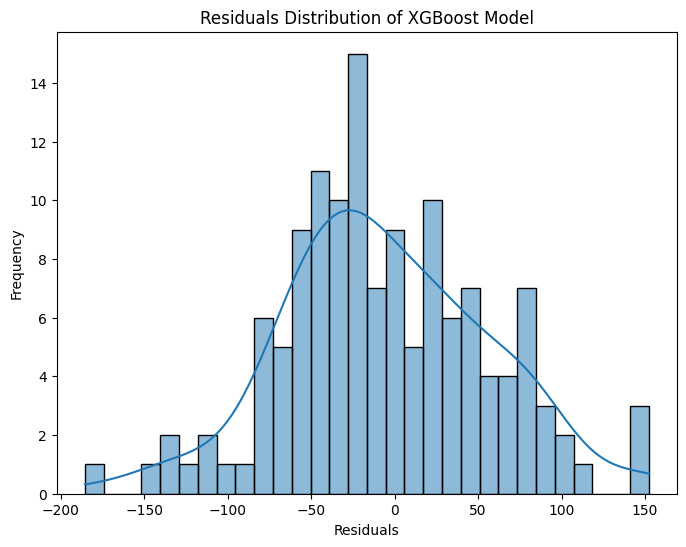

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(y_test - test_predictions, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution of XGBoost Model")
plt.show()

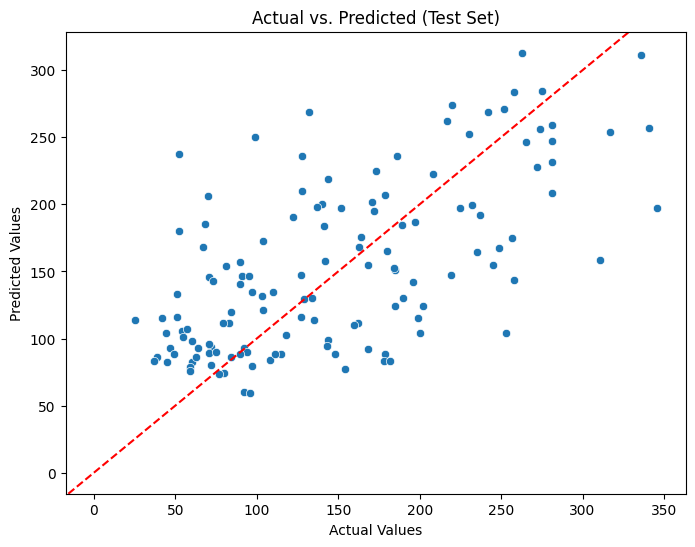

In [9]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=test_predictions)
plt.axline([0, 0], [1, 1], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted (Test Set)")
plt.show()